<a href="https://colab.research.google.com/github/cpython-projects/python_da_06_11_25/blob/main/lesson_18_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Легенда

**[Students Performance in Exams](https://github.com/cpython-projects/python_da_06_11_25/blob/main/StudentsPerformance.csv)**

Датасет містить інформацію про результати учнів та деякі соціальні характеристики, які можуть впливати на успішність.

## Опис змінних

* **gender** — стать учня
* **race/ethnicity** — етнічна група учня
* **parental level of education** — рівень освіти батьків
* **lunch** — тип харчування в школі
* **test preparation course** — чи проходив учень підготовчий курс перед іспитом
* **math score** — бал за іспит з математики
* **reading score** — бал за іспит з читання
* **writing score** — бал за іспит з письма

In [3]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cpython-projects/python_da_06_11_25/refs/heads/main/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Task 1  

**Адміністрація школи хоче зрозуміти:**
> якщо учень добре справляється з читанням, чи можна очікувати, що він так само добре напише письмову частину іспиту?

In [6]:
fig = px.scatter(df, x='reading score', y='writing score')
fig.show()

In [7]:
fig = px.scatter(
    df,
    x='reading score',
    y='writing score',
    trendline='ols')
fig.show()

In [8]:
df['writing score'].corr(df['reading score'])

np.float64(0.9545980771462476)

# Task 2  

**Методичний відділ школи обговорює:**
> чи мають учні з високими результатами з письма стабільно кращі результати з математики, чи ці навички розвиваються незалежно?

In [9]:
fig = px.scatter(df, x='math score', y='writing score', trendline='ols')
fig.show()

In [10]:
import scipy.stats as stats

print(stats.pearsonr(df['math score'], df['writing score']))
print(stats.spearmanr(df['math score'], df['writing score']))

PearsonRResult(statistic=np.float64(0.802642045949808), pvalue=np.float64(3.3760270425673703e-226))
SignificanceResult(statistic=np.float64(0.7783385899971924), pvalue=np.float64(5.853058974157784e-204))


# Task 3  

**Керівництво школи цікавиться:**
> чи мають учні з сімей з вищим рівнем освіти батьків кращі результати з математики, і чи цей фактор варто враховувати при плануванні підтримки учнів?

In [11]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [12]:
edu_level = {
    'some high school': 1,
    'high school': 2,
    'some college': 3,
    "bachelor's degree": 4,
    "master's degree": 5,
    "associate's degree": 6,
}

df['parent_edu_level'] = df['parental level of education'].map(edu_level)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parent_edu_level
0,female,group B,bachelor's degree,standard,none,72,72,74,4
1,female,group C,some college,standard,completed,69,90,88,3
2,female,group B,master's degree,standard,none,90,95,93,5
3,male,group A,associate's degree,free/reduced,none,47,57,44,6
4,male,group C,some college,standard,none,76,78,75,3
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,5
996,male,group C,high school,free/reduced,none,62,55,55,2
997,female,group C,high school,free/reduced,completed,59,71,65,2
998,female,group D,some college,standard,completed,68,78,77,3


In [13]:
stats.spearmanr(df['parent_edu_level'], df['math score'])

SignificanceResult(statistic=np.float64(0.12680471305169597), pvalue=np.float64(5.791616388501453e-05))

In [14]:
stats.kendalltau(df['parent_edu_level'], df['math score'])

SignificanceResult(statistic=np.float64(0.09409592032719961), pvalue=np.float64(4.9753858127626056e-05))

# Task 4  

**Керівництво школи хоче зрозуміти:**
> чи узгоджується порядок рівнів освіти батьків з порядком успішності учнів з математики?

In [15]:
stats.kendalltau(df['parent_edu_level'], df['math score'])

SignificanceResult(statistic=np.float64(0.09409592032719961), pvalue=np.float64(4.9753858127626056e-05))

# Task 5  

> Школа планує збільшити бюджет на підготовчі курси і хоче точно знати: чи реально вони покращують результати з математики.
> Адміністрація хоче впевнено сказати: *«Ці курси підвищують середній бал учнів на X балів, і ми можемо на це покладатися»*.

**Підказка:**

1. Порівняти середні результати з математики у двох групах:

   * учні, які пройшли курс
   * учні, які не проходили курс
2. Подумати: чи можна бути впевненим, що різниця середніх **реальна**, а не випадкова? **треба оцінити “надійність” середньої різниці** — тобто знайти інтервал, у якому, з високою ймовірністю, лежить справжній ефект курсу.

In [16]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [17]:
math_completed_df = df[df['test preparation course'] == 'completed']['math score']
math_none_df = df[df['test preparation course'] == 'none']['math score']

<Axes: >

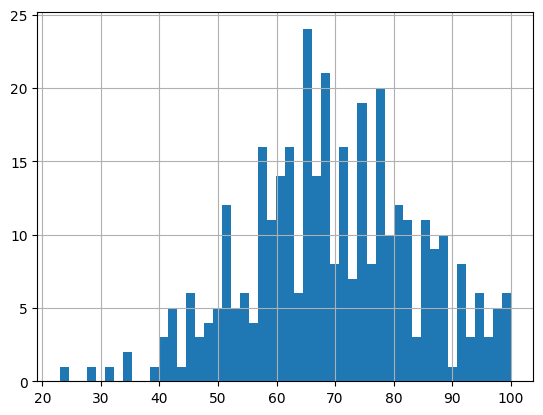

In [20]:
math_completed_df.hist(bins=50)

<Axes: >

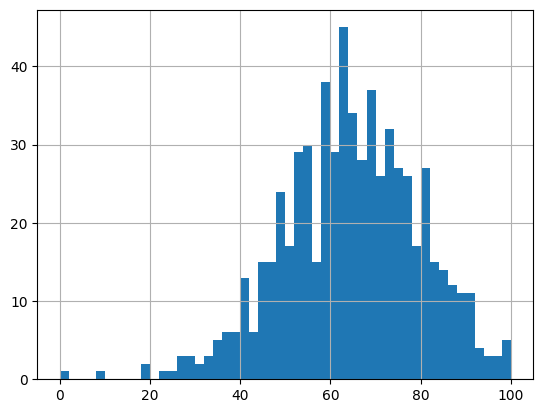

In [22]:
math_none_df.hist(bins=50)

In [23]:

n1, n2 = len(math_completed_df), len(math_none_df)


res_completed = stats.norm.interval(
    confidence=0.95,
    loc=math_completed_df.mean(),
    scale=math_completed_df.std() / n1 ** 0.5
)


res_not_completed = stats.norm.interval(
    confidence=0.95,
    loc=math_none_df.mean(),
    scale=math_none_df.std() / n2 ** 0.5
)

In [24]:
res_completed


(np.float64(68.19924311246356), np.float64(71.19181834005042))

In [25]:
res_not_completed


(np.float64(62.90269654553577), np.float64(65.25306669433962))